<a href="https://colab.research.google.com/github/Donjoyii/Google-Colaboratory/blob/main/Sar_processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = "hello goolge colaboratory"
print(a)
b = "Hello Sar"
print(b)

hello goolge colaboratory
Hello Sar


In [ ]:
a = plt.imread('river_2.bmp')
a.shape

(256, 256)

(256, 256)


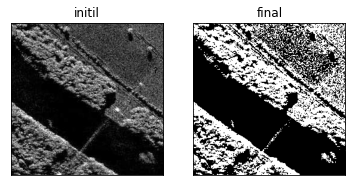

In [ ]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt
#读取原始图像灰度颜色
img = cv2.imread('/content/river_2.bmp', 0) 
print(img.shape)
#获取图像高度、宽
rows, cols = img.shape[:]
#图像二维像素转换为一维
data = img.reshape((rows * cols, 1))
data = np.float32(data)
#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS
#K-Means聚类 聚集成4类
compactness, labels, centers = cv2.kmeans(data, 2, None, criteria, 10, flags)
#生成最终图像
dst = labels.reshape((img.shape[0], img.shape[1]))
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#显示图像
titles = [u'initil', u'final'] 
images = [img, dst] 
for i in range(2): 
 plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
 plt.title(titles[i]) 
 plt.xticks([]),plt.yticks([]) 
plt.show()

迭代次数 = 1, 目标函数值 = 124234756.50026469
迭代次数 = 2, 目标函数值 = 93301389.58404796
迭代次数 = 3, 目标函数值 = 93253627.59826443
迭代次数 = 4, 目标函数值 = 92595605.45356013
迭代次数 = 5, 目标函数值 = 86249827.14739613
迭代次数 = 6, 目标函数值 = 62375825.24017491
迭代次数 = 7, 目标函数值 = 45781570.17604784
迭代次数 = 8, 目标函数值 = 43739717.85642112
迭代次数 = 9, 目标函数值 = 43498231.591285296
迭代次数 = 10, 目标函数值 = 43429947.663548976
迭代次数 = 11, 目标函数值 = 43406096.63392687
迭代次数 = 12, 目标函数值 = 43397517.39645526
迭代次数 = 13, 目标函数值 = 43394403.73578797
迭代次数 = 14, 目标函数值 = 43393268.4732185
迭代次数 = 15, 目标函数值 = 43392853.4356734
迭代次数 = 16, 目标函数值 = 43392701.4598353
迭代次数 = 17, 目标函数值 = 43392645.75654243
迭代次数 = 18, 目标函数值 = 43392625.327881396
迭代次数 = 19, 目标函数值 = 43392617.83327393
迭代次数 = 20, 目标函数值 = 43392615.08308985
迭代次数 = 21, 目标函数值 = 43392614.0738426
迭代次数 = 22, 目标函数值 = 43392613.70338716
迭代次数 = 23, 目标函数值 = 43392613.56745673
迭代次数 = 24, 目标函数值 = 43392613.5175378
迭代次数 = 25, 目标函数值 = 43392613.499202445
迭代次数 = 26, 目标函数值 = 43392613.4924768
迭代次数 = 27, 目标函数值 = 43392613.49003417
迭代次数 = 28, 

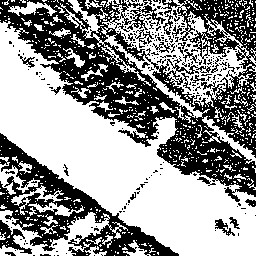

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
 
C = 2
M = 2
EPSILON = 0.001
 
def get_init_fuzzy_mat(pixel_count):
    global C
    fuzzy_mat = np.zeros((C, pixel_count))
    for col in range(pixel_count):
        temp_sum = 0
        randoms = np.random.rand(C - 1, 1)
        for row in range(C - 1):
            fuzzy_mat[row, col] = randoms[row, 0] * (1 - temp_sum)
            temp_sum += fuzzy_mat[row, col]
        fuzzy_mat[-1, col] = 1 - temp_sum
    return fuzzy_mat
 
def get_centroids(data_array, fuzzy_mat):
    global M
    class_num, pixel_count = fuzzy_mat.shape[:2]
    centroids = np.zeros((class_num, 1))
    for i in range(class_num):
        fenzi = 0.
        fenmu = 0.
        for pixel in range(pixel_count):
            fenzi += np.power(fuzzy_mat[i, pixel], M) * data_array[0, pixel]
            fenmu += np.power(fuzzy_mat[i, pixel], M)
        centroids[i,0] = fenzi / fenmu
    return centroids
 
def eculidDistance(vectA, vectB):
    return np.sqrt(np.sum(np.power(vectA - vectB, 2)))
 
def eculid_distance(pixel_1, pixel_2):
    return np.power(pixel_1-pixel_2, 2)
 
def cal_fcm_function(fuzzy_mat, centroids, data_array):
    global M
    class_num, pixel_count = fuzzy_mat.shape[:2]
    target_value = 0.0
    for c in range(class_num):
        for p in range(pixel_count):
            target_value += eculid_distance(data_array[0,p], centroids[c,0])*np.power(fuzzy_mat[c,p], M)
    return target_value
 
def get_label(fuzzy_mat, data_array):
    pixel_count = data_array.shape[1]
    label = np.zeros((1,pixel_count))
 
    for i in range(pixel_count):
        if fuzzy_mat[0,i] > fuzzy_mat[1,i]:
            label[0,i] = 0
        else:
            label[0,i] = 255
    return label
 
def cal_fuzzy_mat(data_array, centroids):
    global M
    pixel_count = data_array.shape[1]
    class_num = centroids.shape[0]
    new_fuzzy_mat = np.zeros((class_num, pixel_count))
    for p in range(pixel_count):
        for c in range(class_num):
            temp_sum = 0.
            Dik = eculid_distance(data_array[0,p], centroids[c,0])
            for i in range(class_num):
                temp_sum += np.power(Dik/(eculid_distance(data_array[0,p], centroids[i,0])), (1/(M-1)))
            new_fuzzy_mat[c,p] = 1/temp_sum
    return new_fuzzy_mat
 
def fcm(init_fuzzy_mat, init_centroids, data_array):
    global EPSILON
    last_target_function = cal_fcm_function(init_fuzzy_mat, init_centroids, data_array)
    print("迭代次数 = 1, 目标函数值 = {}".format(last_target_function))
    fuzzy_mat = cal_fuzzy_mat(data_array, init_centroids)
    centroids = get_centroids(data_array, fuzzy_mat)
    target_function = cal_fcm_function(fuzzy_mat, centroids, data_array)
    print("迭代次数 = 2, 目标函数值 = {}".format(target_function))
    count = 3
    while count < 100:
        if abs(target_function-last_target_function) <= EPSILON:
            break
        else:
            last_target_function = target_function
            fuzzy_mat = cal_fuzzy_mat(data_array, centroids)
            centroids = get_centroids(data_array, fuzzy_mat)
            target_function = cal_fcm_function(fuzzy_mat, centroids, data_array)
            print("迭代次数 = {}, 目标函数值 = {}".format(count, target_function))
            count += 1
    return fuzzy_mat, centroids, target_function
 
 
 
image = cv2.imread(r"/content/river_2.bmp", cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape[:2]
pixel_count = rows * cols
image_array = image.reshape(1, pixel_count)
# print(image_array[1])
# 初始模糊矩阵
init_fuzzy_mat = get_init_fuzzy_mat(pixel_count)
# 初始聚类中心
init_centroids = get_centroids(image_array, init_fuzzy_mat)
fuzzy_mat, centroids, target_function = fcm(init_fuzzy_mat, init_centroids, image_array)
label = get_label(fuzzy_mat, image_array)
new_image = label.reshape(rows, cols)
cv2_imshow(new_image)
# cv2.imwrite("fcm_result.jpg",new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

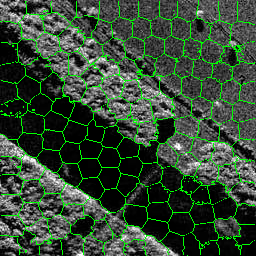

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("river_2.bmp")
### SLIC 算法
# 初始化slic项，超像素平均尺寸20（默认为10），平滑因子20
slic = cv2.ximgproc.createSuperpixelSLIC(img, region_size=20, ruler=20.0) 
slic.iterate(100)     # 迭代次数，越大效果越好
mask_slic = slic.getLabelContourMask()     # 获取Mask，超像素边缘Mask==1
label_slic = slic.getLabels()     # 获取超像素标签
number_slic = slic.getNumberOfSuperpixels()     # 获取超像素数目
mask_inv_slic = cv2.bitwise_not(mask_slic)  
img_slic = cv2.bitwise_and(img, img, mask=mask_inv_slic) #在原图上绘制超像素边界

color_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
color_img[:] = (0, 255 , 0)
result_ = cv2.bitwise_and(color_img, color_img, mask=mask_slic)
result = cv2.add(img_slic, result_)
cv2_imshow(result)
# cv2.imwrite(result)
